# Question # 1: Implementing Rosenblatt’s Perceptron from Scratch

### 1. Data Generation and Visualization


First 5 samples:
Sample 0: [2.74144782 4.0683512 ] - Class 1
Sample 1: [3.71978256 3.4066935 ] - Class 1
Sample 2: [2.18486422 0.81680218] - Class 0
Sample 3: [0.29459635 2.63756352] - Class 0
Sample 4: [3.90968761 3.42325905] - Class 1



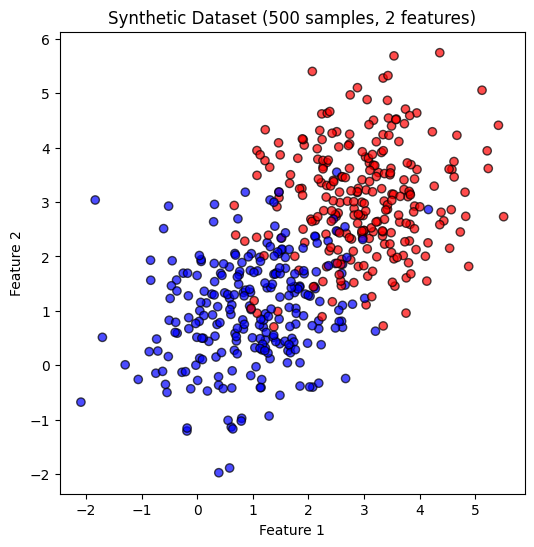

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
N = 500

# Generate synthetic dataset
# We'll create two clusters:
#   - Class 0 centered at (1,1)
#   - Class 1 centered at (3,3)
# Each cluster has N/2 points.

N_class = N // 2
mean_class0 = [1, 1]
mean_class1 = [3, 3]

# Covariance matrix (shared by both classes)
cov = [[1.0, 0.2],
       [0.2, 1.0]]

# samples
X_class0 = np.random.multivariate_normal(mean_class0, cov, N_class)
X_class1 = np.random.multivariate_normal(mean_class1, cov, N_class)

# Create labels: 0 for class0, 1 for class1
y_class0 = np.zeros(N_class)
y_class1 = np.ones(N_class)

# Combine into one dataset
X = np.vstack((X_class0, X_class1))
y = np.concatenate((y_class0, y_class1))

# Shuffle the dataset
indices = np.arange(N)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Print the first 5 samples
print("First 5 samples:")
for i in range(5):
    print(f"Sample {i}: {X[i]} - Class {int(y[i])}")
print()

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.title("Synthetic Dataset (500 samples, 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 2. Train-Test Split

In [25]:
train_size = int(0.8 * N)  # 80% for training
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

### 3. Perceptron Implementation (Forward & Backward Pass)


In [26]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        """
        Initialize weights and bias to zeros (or small random values).
        input_dim: number of features
        This class follows the Rosenblatt's Neural Network example in the example numerical on gcr.
        """
        self.learning_rate = learning_rate
        # Weights: shape (input_dim,)
        self.weights = np.zeros(input_dim)
        # Bias: a single scalar
        self.bias = 0.0
        
    def step_function(self, z):
        """
        Step activation function:
            f(z) =  1 if z ≥ 0
                    0 if z < 0
        """
        return np.where(z >= 0, 1, 0)
    
    def forward(self, X):
        """
        Forward pass: w[1]*x[1] + w[2]*x[2] +...+ bias
        x has shape (N, input_dim)
        """
        z = np.dot(X, self.weights) + self.bias  
        return self.step_function(z)
    
    def train(self, X, y, epochs=50):
        """
        Training the perceptron using the perceptron learning rule.
        
        Perceptron learning rule:
            e = y − yˆ
            w_new[i] = w + lr * e * x[i]
            b_new = b + lr * e
        
        """
        errors_per_epoch = []
        
        for epoch in range(epochs):
            total_errors = 0
            for xi, target in zip(X, y):
                # Forward pass
                prediction = self.forward(xi.reshape(1, -1))  # shape (1,)
                error = target - prediction  # shape (1,)  
                
                # Update if there's an error
                if error != 0:
                    # Update weights and bias
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    total_errors += abs(error)
            
            errors_per_epoch.append(total_errors)
            # Stop if no error
            if total_errors == 0:
                break
        
        return errors_per_epoch
    
    def predict(self, X):
        """
        Prediction: step function of the weighted sum
        """
        return self.forward(X)

### # 4. Training the Perceptron


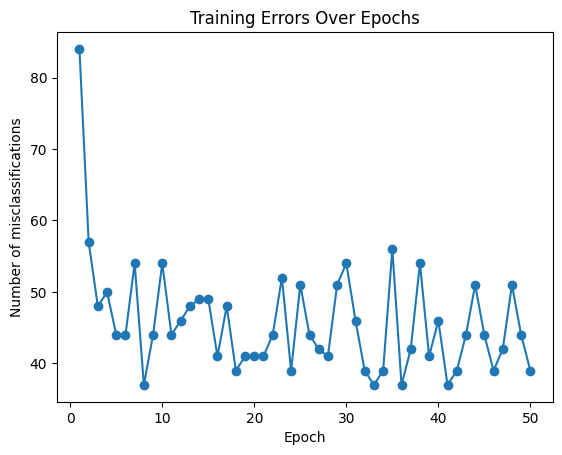

In [27]:
# Perceptron for 2D input
perceptron = Perceptron(input_dim=2, learning_rate=0.01)

# Train and track the errors per iteration
epochs = 50
errors = perceptron.train(X_train, y_train, epochs=epochs)

plt.figure()
plt.plot(range(1, epochs+1), errors, marker='o')
plt.title("Training Errors Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Number of misclassifications")
plt.show()

### # 5. Visualization: Decision Boundary


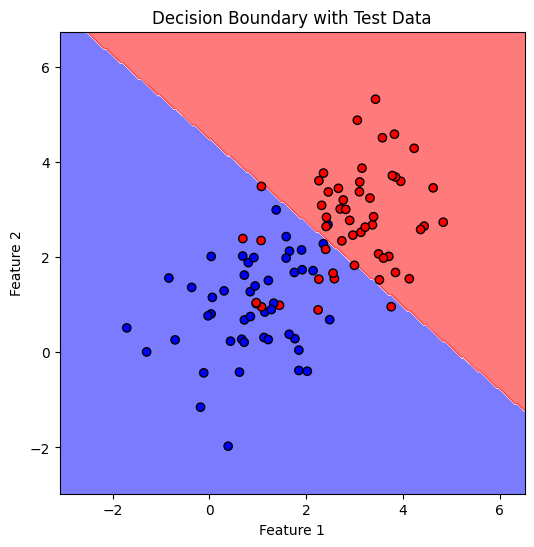

In [28]:
# Generate a grid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid so we can feed into the perceptron
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap='bwr')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k')
plt.title("Decision Boundary with Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 6. Evaluation on Test Data


In [29]:
y_pred_test = perceptron.predict(X_test)
accuracy = np.mean(y_pred_test == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 86.00%


### Discussion:
 - The perceptron updates weights and bias each time it misclassifies a sample.
 - The step function is used as the activation.
 - The number of training errors typically decreases over each iteration.
 - The decision boundary is a single straight line.
